In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df1 = pd.read_csv('./archieve/2022_world_cup_groups.csv', header=None)
df2 = pd.read_csv('./archieve/2022_world_cup_matches.csv', header=None)
df3 = pd.read_csv('./archieve/data_dictionary.csv', header=None)
df4 = pd.read_csv('./archieve/international_matches.csv', header=None)
df5 = pd.read_csv('./archieve/world_cup_matches.csv', header=None)
df6 = pd.read_csv('./archieve/world_cups.csv', header=None)
print("2022 월드컵 각 그룹별 국가 편성\n")
df1.head(len(df1))

2022 월드컵 각 그룹별 국가 편성



,0,1,2
0,Group,Team,FIFA Ranking
1,A,Qatar,50
2,A,Ecuador,44
3,A,Senegal,18
4,A,Netherlands,8
5,B,England,5
6,B,Iran,20
7,B,United States,16
8,B,Wales,19
9,C,Argentina,3


In [310]:
print("2022 월드컵 매치 일정\n")
df2.head(len(df2))

2022 월드컵 매치 일정



,0,1,2,3,4,5,6
0,ID,Year,Date,Stage,Home Team,Away Team,Host Team
1,1,2022,2022/11/20,Group stage,Qatar,Ecuador,TRUE
2,2,2022,2022/11/21,Group stage,Senegal,Netherlands,FALSE
3,3,2022,2022/11/21,Group stage,England,Iran,FALSE
4,4,2022,2022/11/21,Group stage,United States,Wales,FALSE
...,...,...,...,...,...,...,...
60,60,2022,2022/12/10,Quarter-finals,W55,W56,NaN
61,61,2022,2022/12/13,Semi-finals,W57,W58,NaN
62,62,2022,2022/12/14,Semi-finals,W59,W60,NaN
63,63,2022,2022/12/17,Third place,L61,L62,NaN


In [311]:
print("각 csv 파일(Table)별 Field에 대한 설명\n")
df3.head(len(df3))

각 csv 파일(Table)별 Field에 대한 설명



,0,1,2
0,Table,Field,Description
1,world_cups,Year,Year in which the World Cup took place
2,world_cups,Host Country,Country that hosted the tournament
3,world_cups,Winner,Country that won the tournament
4,world_cups,Runners-Up,Country that received second place
5,world_cups,Third,Country that received third place
6,world_cups,Fourth,Country that received fourth place
7,world_cups,Goals Scored,Total number of goals scored in the tournament
8,world_cups,Qualified Teams,Total number of teams that participated in the...
9,world_cups,Matches Played,Total number of matches played in the tournament


In [312]:
print("국제경기 기록\n")
df4.head(len(df4))

국제경기 기록



,0,1,2,3,4,5,6,7,8,9,10
0,1,Friendly,1872-11-30,Scotland,0,0,England,NaN,NaN,NaN,True
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,NaN,True
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,NaN,True
3,4,Friendly,1875-03-06,England,2,2,Scotland,NaN,NaN,NaN,True
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
17764,17765,Friendly,2022-09-27,Qatar,2,2,Chile,NaN,NaN,NaN,False
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,NaN,True
17767,17768,UEFA Nations League,2022-09-27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True


In [313]:
print("역대 월드컵 매치 기록\n")
df5.head(len(df5))

역대 월드컵 매치 기록



,0,1,2,3,4,5,6,7,8,9,10,11
0,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
1,1,1930,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,FALSE
2,2,1930,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,FALSE
3,3,1930,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,FALSE
4,4,1930,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),TRUE
897,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,FALSE
898,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,FALSE
899,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,FALSE


In [314]:
print("역대 월드컵\n")
df6.head(len(df6))

역대 월드컵



,0,1,2,3,4,5,6,7,8
0,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18
2,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17
3,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18
4,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22
5,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26
6,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35
7,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32
8,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32
9,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32


In [315]:
# international_match의 0행 이름을 각자 변경
df4.rename(columns={0:'ID'}, inplace= True)
df4.rename(columns={1:'Tournament'}, inplace= True)
df4.rename(columns={2:'Date'}, inplace= True)
df4.rename(columns={3:'Home Team'}, inplace= True)
df4.rename(columns={4:'Home Goals'}, inplace= True)
df4.rename(columns={5:'Away Goals'}, inplace= True)
df4.rename(columns={6:'Away Team'}, inplace= True)
df4.rename(columns={7:'Winning Team'}, inplace= True)
df4.rename(columns={8:'Losing Team'}, inplace= True)
df4.rename(columns={9:'Win Conditions'}, inplace= True)
df4.rename(columns={10:'Home Stadium'}, inplace= True)

# 득실차 추가
df4['Goal Difference'] =  np.absolute(df4['Home Goals'] - df4['Away Goals'])
df4.head(len(df4))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference
0,1,Friendly,1872-11-30,Scotland,0,0,England,NaN,NaN,NaN,True,0
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,NaN,True,2
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,NaN,True,1
3,4,Friendly,1875-03-06,England,2,2,Scotland,NaN,NaN,NaN,True,0
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,NaN,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17764,17765,Friendly,2022-09-27,Qatar,2,2,Chile,NaN,NaN,NaN,False,0
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False,0
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,NaN,True,1
17767,17768,UEFA Nations League,2022-09-27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True,1


In [368]:
df4['Winning Team'] = df4['Winning Team'].fillna('Draw')        # NaN값 Draw로 대체
df4['Losing Team'] = df4['Losing Team'].fillna('Draw')          # NaN값 Draw로 대체
df4['Win Conditions'] = df4['Win Conditions'].fillna('No')      # Win condition: 패널티킥으로 승리 하였는가? -> 토너먼트대회
df = df4[(df4['Home Team'] == 'Qatar') | (df4['Away Team'] == 'Qatar')]
Qatar = df.iloc[:]
Qatar.head(len(df4))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference
3925,3926,Gulf Cup,1970-03-27,Bahrain,2,1,Qatar,Bahrain,Qatar,No,True,1
3928,3929,Gulf Cup,1970-03-31,Kuwait,4,2,Qatar,Kuwait,Qatar,No,False,2
3930,3931,Gulf Cup,1970-04-02,Saudi Arabia,1,1,Qatar,Draw,Draw,No,False,0
4170,4171,Palestine Cup,1972-01-04,Algeria,3,0,Qatar,Algeria,Qatar,No,False,3
4171,4172,Palestine Cup,1972-01-06,Syria,3,2,Qatar,Syria,Qatar,No,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17530,17531,Arab Cup,2021-12-18,Qatar,0,0,Egypt,Draw,Draw,Qatar win on penalties,True,0
17611,17612,Friendly,2022-03-26,Qatar,2,1,Bulgaria,Qatar,Bulgaria,No,True,1
17638,17639,Friendly,2022-03-29,Qatar,0,0,Slovenia,Draw,Draw,No,True,0
17736,17737,Friendly,2022-09-23,Canada,2,0,Qatar,Canada,Qatar,No,False,2


In [369]:
year = []
for row in Qatar['Date']:
    year.append(int(row[:4]))
Qatar['match_count'] = year
Qatar_match = Qatar[Qatar.match_count >= 1800]
Qatar_match.count()

ID                 565
Tournament         565
Date               565
Home Team          565
Home Goals         565
Away Goals         565
Away Team          565
Winning Team       565
Losing Team        565
Win Conditions     565
Home Stadium       565
Goal Difference    565
match_count        565
dtype: int64

<AxesSubplot: xlabel='Qatar_Results', ylabel='count'>

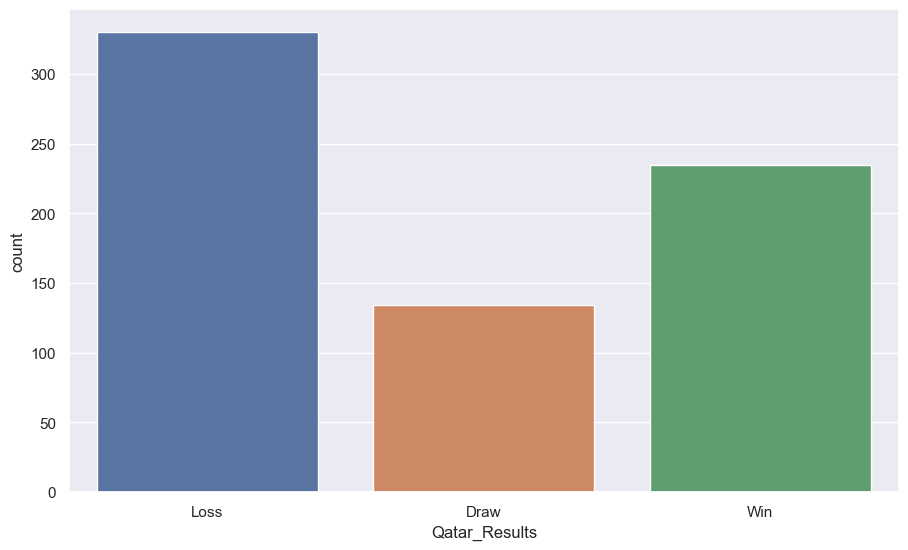

In [370]:
wins = []
for row in Qatar_match['Winning Team']:
    if row == 'Qatar':
        wins.append('Win')
    else:
        if row != 'Qatar':
            wins.append('Loss')
        if row == 'Draw':
            wins.append('Draw')
winsdf= pd.DataFrame(wins, columns=['Qatar_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Qatar_Results', data=winsdf)